### 1. Описание данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv('telecom_users.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [74]:
data.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total Charges тоже является типом object, необходимо его преобразовать для дальнейшего расчета статистик:

In [35]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].str.replace('\D', '.'), errors = 'coerce')

In [7]:
#проверим наличие отсутствующих данных (NaN)
data.isna().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [36]:
#избавляемся от Nan значений
data = data.dropna()

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [9]:
data.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,3534.770750,0.161647,32.523092,64.846687,2298.060617
std,2035.409858,0.368157,24.500858,30.107576,2274.127165
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,1779.750000,0.000000,9.000000,35.750000,404.312500
50%,3548.000000,0.000000,29.000000,70.425000,1412.150000
75%,5293.500000,0.000000,56.000000,89.900000,3846.962500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


Отсюда мы видим, что средний срок, сколько люди являются клиентами компании, составляет 32 месяца, причем максимальный - 72 месяца, а минимальный 1 месяц, что логично, ведь нельзя купить подписку меньше, чем на один месяц. Медианное значение - 29 месяцев, что близко к среднему. 

Средний ежемесячный платеж - 64,85, минимальный - 18.25, а максимальный - 118.75. Интересно в дальнейшем посмотреть, как зависит размер ежемесячного платежа на кол-во месяцев, которое человек являлся клиентом компании. 

Средний размер общей выплаты - 2 298, интересно, что медианное значение при этом почти в два раза меньше, при этом максимальное значение - 8 684, что почти в 4 раза выше среднего. Минимальное значение при этом составляет - 18.8. Возможно это означает, что небольшое количество клиентов платит бОльшие суммы в месяц по сравнению с остальными, либо подписаны бОльшее кол-во времени, т.к. медианный ежемесячный платеж несильно смещен от среднего значения.

In [10]:
data.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
unique,5976,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3044,3080,4195,5388,2843,2627,2982,2604,2639,2959,2388,2353,3269,3525,2006,4389


На основании статистики выше можно сделать следующие выводы:

- Всего у нас есть данные о 5976 клиентах.

- В большинстве клиентами компании являются мужчины

- Самый частый тип контракта - Month-to-month.

- Чаще всего клиенты пользуются безбумажным биллингом, метод оплаты - Electronic check.

In [116]:
#проверим, насколько мужчин среди клиентов больше, чем женщин
data[data['gender'] == 0].shape[0]   #кол-во мужчин

3044

In [117]:
data[data['gender'] == 1].shape[0]   #кол-во женщин

2932

Видно, что мужчин действительно больше, но в целом значения не сильно отличаются, из чего можно сделать вывод, что и мужчин, и женщин примерно одинаковое кол-во среди клиентов компании.

In [8]:
#посмотрим на кол-во клиентов и кол-во клиентов, которые больше не пользуются услугами компании
data.Churn.value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

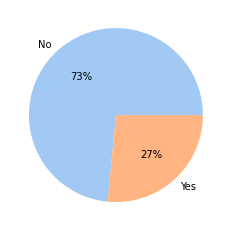

In [10]:
#визуализируем эти данные
target_dist = data.Churn.value_counts()
colors = sns.color_palette('pastel')[0:2]
plt.pie(target_dist, labels = ['No', 'Yes'], colors = colors, autopct='%.0f%%')
plt.show()

#отток составляет 27% клиентов компании

Посмотрим, есть ли корреляции между столбцами данных, для этого данные сначала нужно преобразовать:

In [37]:
#столбцы Unnamed: 0 и customerID не дают нам никакой информации с точки зрения анализа, поэтому их можно удалить
data = data.drop(['Unnamed: 0', 'customerID'], axis = 1)

data['gender'] = data['gender'].map({'Male': 0,'Female': 1})
data['Partner'] = data['Partner'].map({'No': 0,'Yes': 1})
data['Dependents'] = data['Dependents'].map({'No': 0, 'Yes': 1})
data['PhoneService'] = data['PhoneService'].map({'No':0, 'Yes':1})
data['MultipleLines'] = data['MultipleLines'].map({'No':0, 'Yes':1, 'No phone service':2})
data['InternetService'] = data['InternetService'].map({'No':0, 'Fiber optic':1, 'DSL':2})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':2})
data['OnlineBackup'] = data['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':2})
data['DeviceProtection'] = data['DeviceProtection'].map({'No':0, 'Yes':1, 'No internet service':2})
data['TechSupport'] = data['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
data['StreamingTV'] = data['StreamingTV'].map({'No':0, 'Yes':1, 'No internet service':2})
data['StreamingMovies'] = data['StreamingMovies'].map({'No':0, 'Yes':1, 'No internet service':2})
data['Contract'] = data['Contract'].map({'Two year':0, 'Month-to-month':1, 'One year':2})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'No': 0, 'Yes': 1})
data['PaymentMethod'] = data['PaymentMethod'].map({'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1, 
                                                   'Electronic check':2, 'Mailed check':3})
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [38]:
#преобразованный датасет
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,72,1,1,0,2,2,2,2,2,2,0,0,0,24.10,1734.65,0
1,1,0,0,0,44,1,0,1,0,1,1,0,1,0,1,1,0,88.15,3973.20,0
2,1,1,1,0,38,1,1,1,0,0,0,0,0,0,1,1,1,74.95,2869.85,1
3,0,0,0,0,4,1,0,2,0,0,0,0,0,1,1,1,2,55.90,238.50,0
4,0,0,0,0,2,1,0,2,1,0,1,0,0,0,1,0,2,53.45,119.50,0


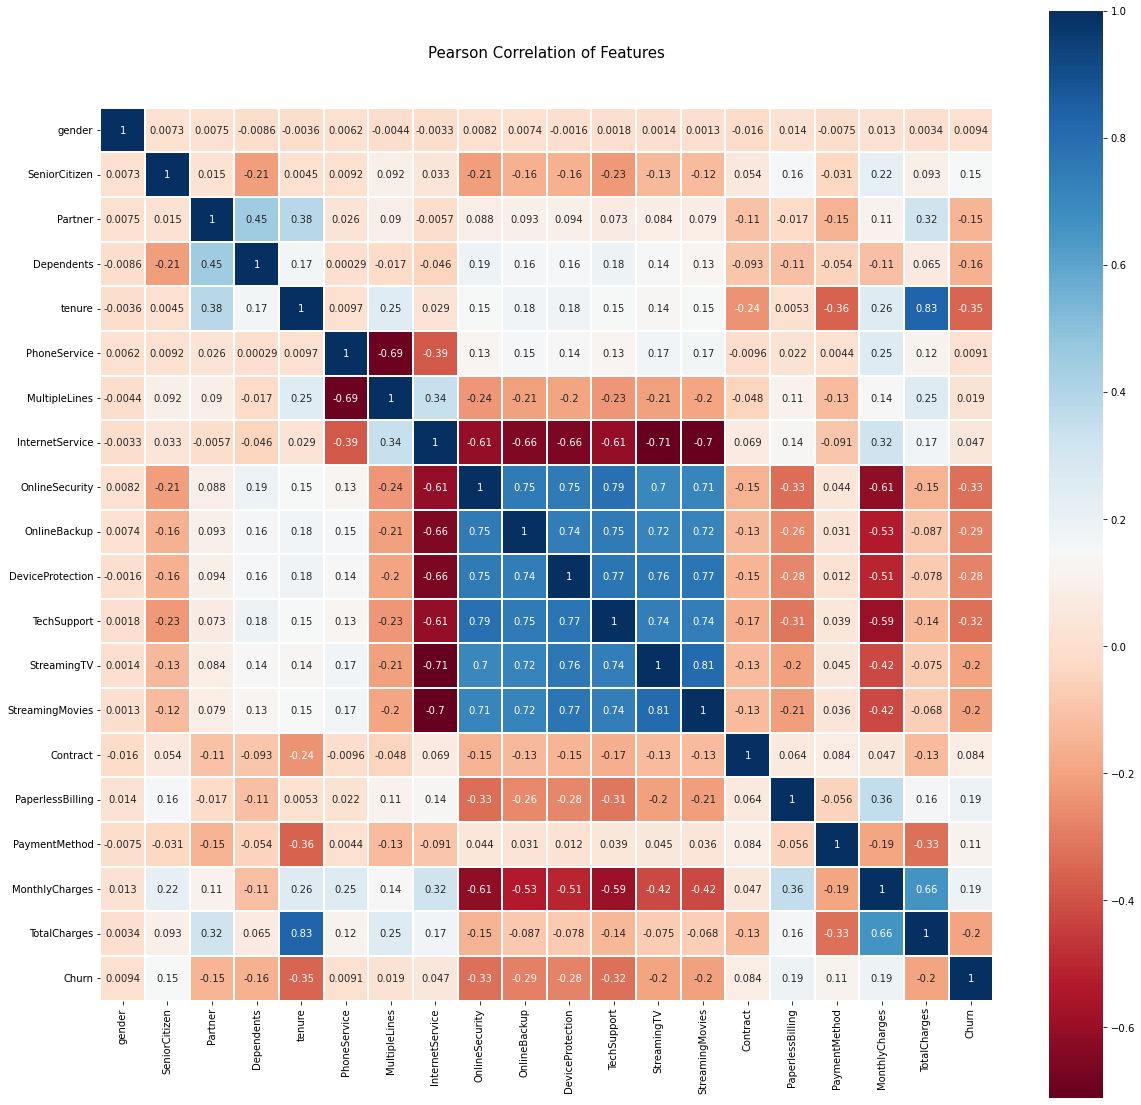

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.show()

Очень хорошо видна корреляция между различными сервисами, из чего можно сделать вывод, что если клиент пользуется каким-либо одним сервисом, то у него также подключены и какие-то дополнительные сервисы.

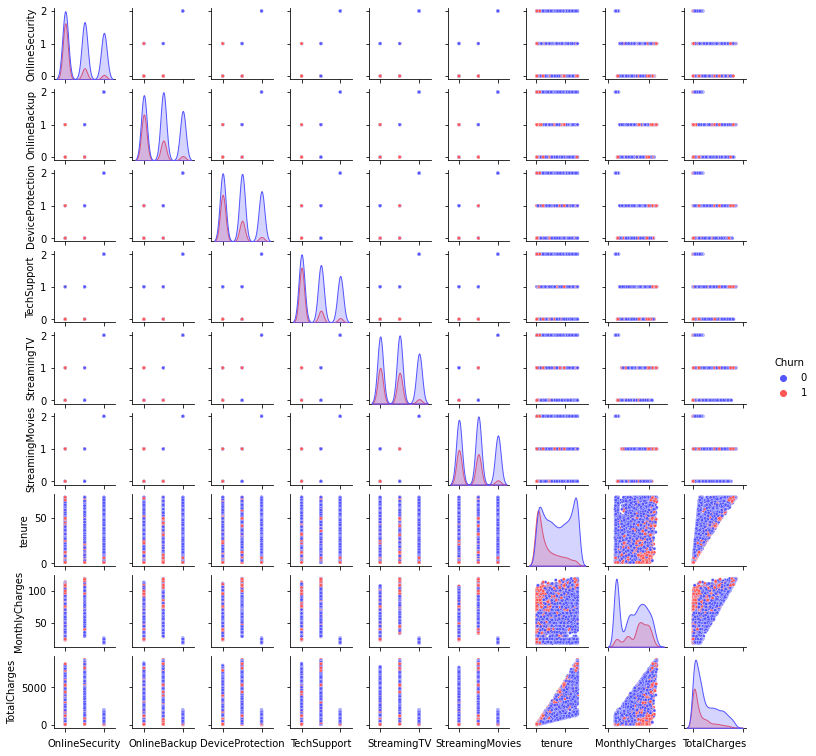

In [20]:
g = sns.pairplot(data[[u'Churn', u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport', 
                       u'StreamingTV', u'StreamingMovies', u'tenure', u'MonthlyCharges', u'TotalCharges']], 
                 hue='Churn', palette = 'seismic', size=1.2, plot_kws=dict(s=10))
g.set(xticklabels=[])

plt.show()

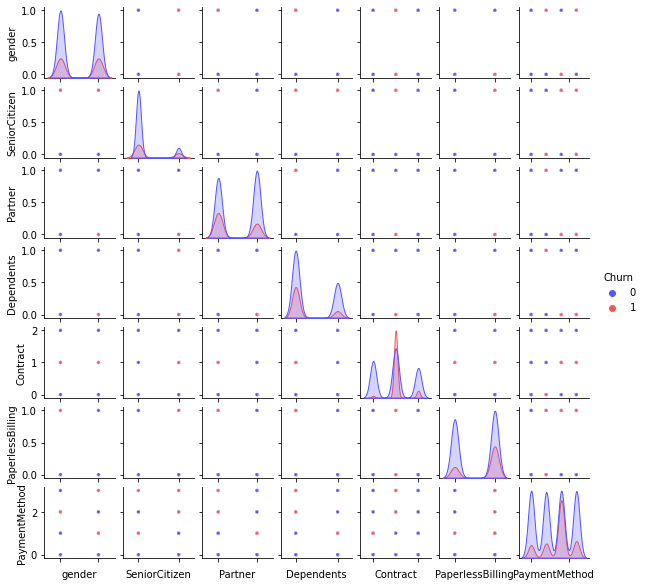

In [21]:
g = sns.pairplot(data[[u'Churn', u'gender', u'SeniorCitizen', u'Partner', u'Dependents', 
                       u'Contract', u'PaperlessBilling', u'PaymentMethod']], 
                 hue='Churn', palette = 'seismic', size=1.2, plot_kws=dict(s=10))
g.set(xticklabels=[])
plt.show()

Датасет можно назвать несбалансированным, так как у нас больше информации о тех, кто остался, чем о тех, кто ушел.

### 2. Исследование зависимостей и формулирование гипотез

In [39]:
#разделим данные на две группы: good_data - клиент остался, bad_data - клиент ушел
good_data = data[data['Churn'] == 0].copy()
bad_data = data[data['Churn'] == 1].copy()

#### Гипотеза 1 - чем выше размер ежемесячной выплаты, тем выше вероятность, что клиент уйдет

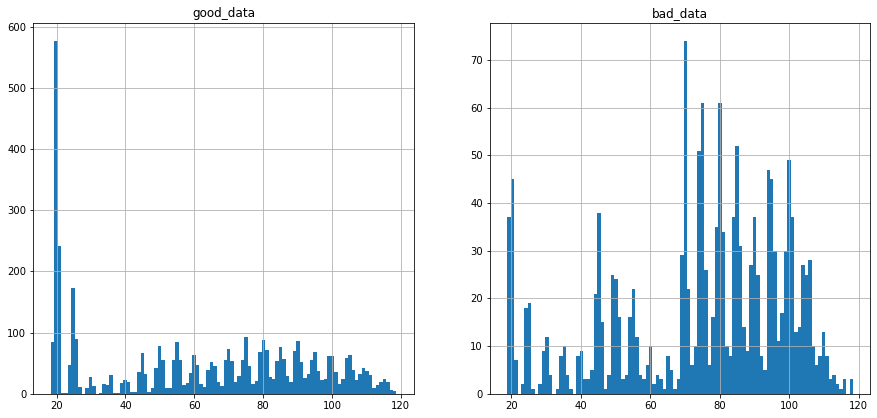

In [23]:
#посмотрим на распредедение признака Monthly Charges
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.title('good_data')
good_data['MonthlyCharges'].hist(bins=100)
plt.subplot(222)
plt.title('bad_data')
bad_data['MonthlyCharges'].hist(bins=100)

plt.show()

По распределениям видно, что среди тех, кто до сих пор является клиентом компании, размер ежемесячных выплат сильно смещен к минимальным значениям (20).

В то же время среди тех, кто ушел очевидно, что наибольший размер выплат приходится на область от 70 до 100.

Гипотеза подтвердилась.

#### Гипотеза 2 - чем больше общая сумма, которую клиент заплатил за все время, тем выше вероятность, что клиент уйдет

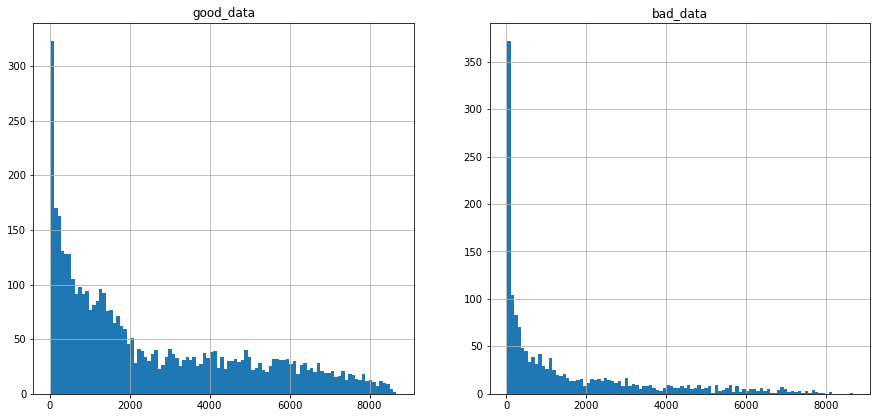

In [24]:
#посмотрим на распредедение признака Total Charges
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.title('good_data')
good_data['TotalCharges'].hist(bins=100)
plt.subplot(222)
plt.title('bad_data')
bad_data['TotalCharges'].hist(bins=100)

plt.show()

Распределения имеют одинаковые формы, поэтому нельзя сказать, что размер выплат за все время напрямую влияет на желание клиента уйти.

Гипотеза не подтвердилась.

#### Гипотеза 3 - чем больше месяцев человек являлся клиентом компании, тем больше вероятность, что он уйдет

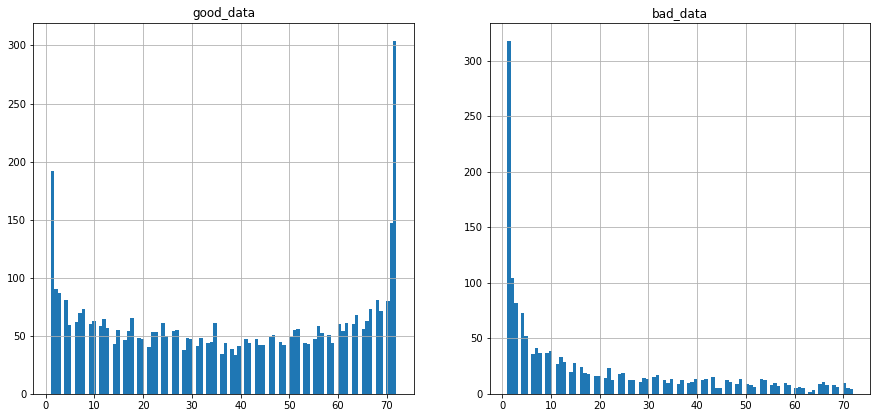

In [25]:
#посмотрим на распредедение признака tenure - сколько месяцев человек являлся клиентом компании
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.title('good_data')
good_data['tenure'].hist(bins=100)
plt.subplot(222)
plt.title('bad_data')
bad_data['tenure'].hist(bins=100)

plt.show()

Очевидно, что бОльшая часть клиентов покидает компанию в первые месяцы работы с компанией. Из чего можно сделать вывод, что у компании получается привлечь клиентов, но не получается удержать именно в первые месяцы. 

На гистаграмме good_data видно, что очень многие клиенты остаются клиентами компании до максимального значения, которое есть в выборке (70 месяцев), что тоже является хорошим показателем, потому что многие клиенты готовы продолжить свою работу с компанией.

Из вышеперечисленных закономерностей можно сделать вывод, что одним из основных факторов оттока является размер ежемесячных выплат. Однако пойти на такой шаг, как снижение стоимости своих услуг, хоть и может показаться самым очевидным, но не самый лучший с точки зрения бизнеса. Возможно, есть еще какие-то закономерности, которые помогут компании удержать клиентов.

Гипотеза не подтвердилась.

#### Гипотеза 4 - клиенты, у которых заключены длительные контракты (на год или два) уходят реже

In [166]:
good_data_contracts = good_data.loc[:, ['Contract', 'Churn']]
good_data_contracts['Contract'] = good_data_contracts['Contract'].map({0:'Two year', 1:'Month-to-month', 2:'One year'})
good_data_contracts.groupby('Contract').count()

,Churn
Contract,
Month-to-month,1871
One year,1127
Two year,1391


In [142]:
bad_data_contracts = bad_data.loc[:, ['Contract', 'Churn']]
bad_data_contracts['Contract'] = bad_data_contracts['Contract'].map({0:'Two year', 1:'Month-to-month', 2:'One year'})
bad_data_contracts.groupby('Contract').count()

,Churn
Contract,
Month-to-month,1398
One year,148
Two year,41


Очевидно, что отток среди клиентов с длительными контрактами - ниже. Проще не продлить обслуживание, когда оно заканчивается в следующем месяце, чем через год. Для компании плюс еще в том, что есть дополнительное время, чтобы завоевать лояльность клиента.

Решением в данном случае может быть - заключение длительных контрактов с клиентами. Это же поможет решить проблему оттока в первые месяцы.

Гипотеза подтвердилась.

#### Гипотеза 5 - подключение дополнительных услуг провоцирует отток клиентов

Сколько клиентов, у которых подключены все эти услуги и которые являются клиентами компании:

In [295]:
df_11 = good_data[(good_data['PhoneService']== 1) & (good_data['OnlineSecurity']== 1) 
          & (good_data['OnlineBackup']== 1) & (good_data['DeviceProtection']== 1) 
          & (good_data['TechSupport']== 1) & (good_data['StreamingTV']== 1)
          & (good_data['StreamingMovies']== 1)].shape[0]
df_12 = good_data.shape[0]

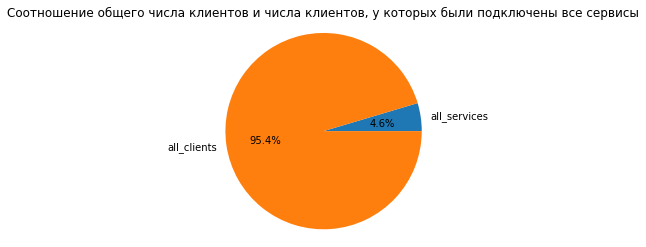

In [297]:
vals = [df_11, df_12]
labels = ['all_services', 'all_clients']

fig, ax = plt.subplots()
ax.pie(vals, labels = labels, autopct ='%1.1f%%')
ax.axis('equal')
plt.title('Соотношение общего числа клиентов и числа клиентов, у которых были подключены все сервисы')

plt.show()

Не более 5% от общего числа, это говорит о том, что в этой области возможен рост.

Сколько клиентов ушло, у которых были подключены все эти услуги:

In [296]:
df_13 = bad_data[(bad_data['PhoneService']== 1) & (bad_data['OnlineSecurity']== 1) 
          & (bad_data['OnlineBackup']== 1) & (bad_data['DeviceProtection']== 1) 
          & (bad_data['TechSupport']== 1) & (bad_data['StreamingTV']== 1)
          & (bad_data['StreamingMovies']== 1)].shape[0]

df_14 = bad_data.shape[0]

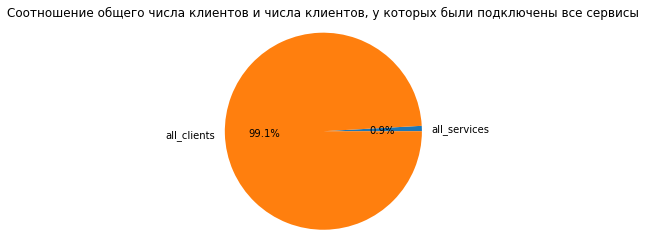

In [299]:
vals = [df_13, df_14]
labels = ['all_services', 'all_clients']

fig, ax = plt.subplots()
ax.pie(vals, labels = labels, autopct ='%1.1f%%')
ax.axis('equal')
plt.title('Соотношение общего числа клиентов и числа клиентов, у которых были подключены все сервисы')

plt.show()

Очень небольшой процент ушедших, из чего можно сделать вывод, что подключение максимального числа сервиса скорее наоборот снижает вероятность оттока.

Посмотрим ту же статистику, но уже чисто для стриминговых сервисов:

In [300]:
df_15 = good_data[(good_data['StreamingTV']== 1)
          & (good_data['StreamingMovies']== 1)].shape[0]
x_15 = 'TV+Movies'

df_16 = bad_data[(bad_data['StreamingTV']== 1)
          & (bad_data['StreamingMovies']== 1)].shape[0]
x_16 = 'TV+Movies_'

df_17 = good_data[(good_data['StreamingMovies']== 1)].shape[0]
x_17 = 'Movies'

df_18 = good_data[(good_data['StreamingTV']== 1)].shape[0]
x_18 = 'TV'

df_19 = bad_data[(bad_data['StreamingTV']== 1)].shape[0]
x_19 = 'TV_'

df_20 = bad_data[(bad_data['StreamingMovies']== 1)].shape[0]
x_20 = 'Movies_'

Можно сделать вывод, что клиенты, предпочитающие стриминогвые сервисы чаще остаются, чем уходят. Т.е. как вариант удержания клиентов, можно предложить им бесплатную пробную подписку на первый месяц, например.

Причем распределение клиентов между стриминоговым телевидением и кинотеатром примерно одинаковое, что среди ушедших, что среди оставшихся. 

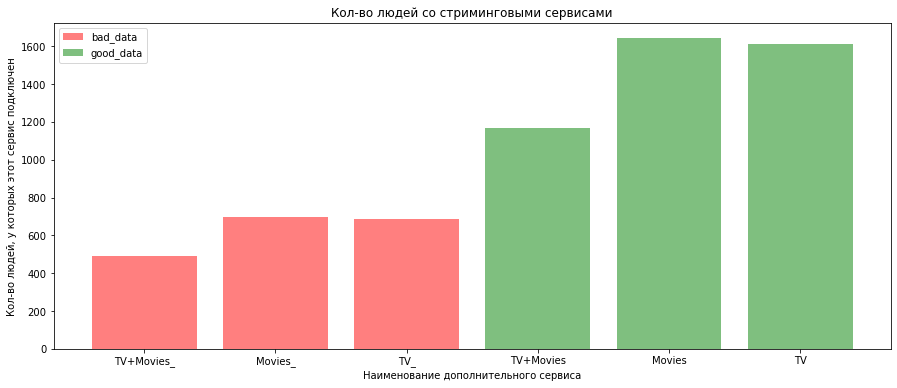

In [404]:
#визуализируем полученные данные
fig, ax = plt.subplots(figsize = (15,6))

ax.bar(x_16, df_16, color = 'red', alpha = 0.5)
ax.bar(x_20, df_20, color = 'red', alpha = 0.5)
ax.bar(x_19, df_19, color = 'red', label = 'bad_data', alpha = 0.5)

ax.bar(x_15, df_15, color = 'green', label = 'good_data', alpha = 0.5)
ax.bar(x_17, df_17, color = 'green', alpha = 0.5)
ax.bar(x_18, df_18, color = 'green', alpha = 0.5)

ax.set_title('Кол-во людей со стриминговыми сервисами')
ax.set_xlabel('Наименование дополнительного сервиса')
ax.set_ylabel('Кол-во людей, у которых этот сервис подключен')
ax.legend()

plt.show()

Таким образом мы выяснили, что само по себе подключение сервисов не влияет на отток, так как стриминговые сервисы скорее наоборот, способствуют удержанию клиентов. Дальше имеет смысл рассмотреть дополнительно другие сервисы по отдельности.

In [26]:
#посмотрим в процентном соотношении

df_21 = ((good_data[(good_data['StreamingTV']== 1)
          & (good_data['StreamingMovies']== 1)].shape[0])/good_data.shape[0])*100
x_21 = 'TV+Movies'

df_22 = ((bad_data[(bad_data['StreamingTV']== 1)
          & (bad_data['StreamingMovies']== 1)].shape[0])/bad_data.shape[0])*100
x_22 = 'TV+Movies_'

df_23 = ((good_data[(good_data['StreamingMovies']== 1)].shape[0])/good_data.shape[0])*100
x_23 = 'Movies'

df_24 = ((good_data[(good_data['StreamingTV']== 1)].shape[0])/good_data.shape[0])*100
x_24 = 'TV'

df_25 = ((bad_data[(bad_data['StreamingTV']== 1)].shape[0])/bad_data.shape[0])*100
x_25 = 'TV_'

df_26 = ((bad_data[(bad_data['StreamingMovies']== 1)].shape[0])/good_data.shape[0])*100
x_26 = 'Movies_'

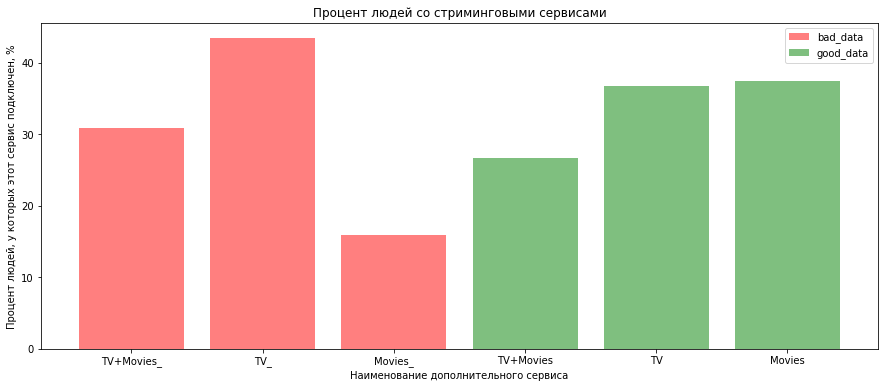

In [27]:
#визуализируем полученные данные
fig, ax = plt.subplots(figsize = (15,6))

ax.bar(x_22, df_22, color = 'red', alpha = 0.5)
ax.bar(x_25, df_25, color = 'red', alpha = 0.5)
ax.bar(x_26, df_26, color = 'red', label = 'bad_data', alpha = 0.5)

ax.bar(x_21, df_21, color = 'green', label = 'good_data', alpha = 0.5)
ax.bar(x_24, df_24, color = 'green', alpha = 0.5)
ax.bar(x_23, df_23, color = 'green', alpha = 0.5)

ax.set_title('Процент людей со стриминговыми сервисами')
ax.set_xlabel('Наименование дополнительного сервиса')
ax.set_ylabel('Процент людей, у которых этот сервис подключен, %')
ax.legend()

plt.show()

Как видно на графике менее, чем у 20% ушедших была подключена услуга стримингового кинотеатра Movies, при этом у оставшихся пользователей эта услуга была подключена у 40% (что вдвое больше), из чего можно сделать вывод, что стриминговый кинотеатр скорее удерживает клиентов, чем провоцирует их на уход.

При этом среди тех, кто смотрит телевидение процент ушедших выше, чем оставшихся. 

In [319]:
#считаем кол-во клиентов в разрезе подключения к дополнительным сервисам
#сразу смотрим относительно тех, кто ушел или остался

df_1 = ((good_data[(good_data['PhoneService']== 1)].shape[0])/good_data.shape[0])*100
x_1 = 'phone_service_'

df_2 = ((bad_data[(bad_data['PhoneService']== 1)].shape[0])/bad_data.shape[0])*100
x_2 = 'phone_service'

df_3 = ((bad_data[(bad_data['OnlineSecurity']== 1) 
          & (bad_data['OnlineBackup']== 1) & (bad_data['DeviceProtection']== 1)].shape[0])/bad_data.shape[0])*100
x_3 = 'bad_security+backup+protection'

df_4 = ((bad_data[(bad_data['OnlineSecurity']== 1)].shape[0])/bad_data.shape[0])*100
x_4 = 'online_security'

df_5 = ((bad_data[(bad_data['OnlineBackup']== 1)].shape[0])/bad_data.shape[0])*100
x_5 = 'online_backup'

df_6 = ((bad_data[(bad_data['DeviceProtection']== 1)].shape[0])/bad_data.shape[0])*100
x_6 = 'device_protection'

df_7 = ((good_data[(good_data['OnlineSecurity']== 1) 
          & (good_data['OnlineBackup']== 1) & (good_data['DeviceProtection']== 1)].shape[0])/good_data.shape[0])*100
x_7 = 'security+backup+protection_'

df_8 = ((good_data[(good_data['OnlineSecurity']== 1)].shape[0])/good_data.shape[0])*100
x_8 = 'online_security_'

df_9 = ((good_data[(good_data['OnlineBackup']== 1)].shape[0])/good_data.shape[0])*100
x_9 = 'online_backup_'

df_10 = ((good_data[(good_data['DeviceProtection']== 1)].shape[0])/good_data.shape[0])*100
x_10 = 'device_protection_'

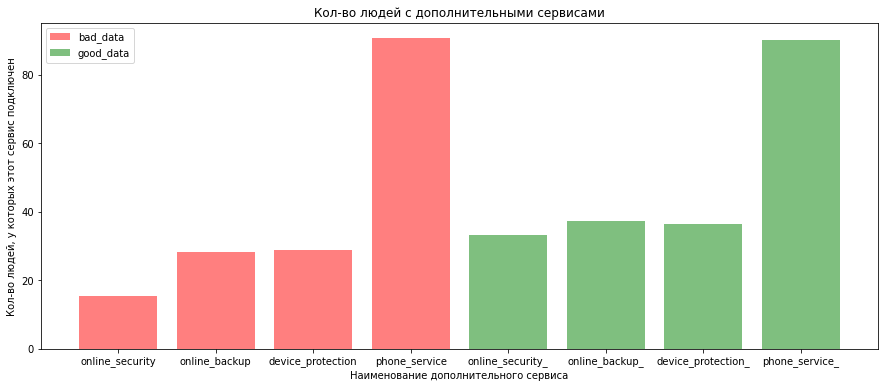

In [341]:
#визуализируем полученные данные
fig, ax = plt.subplots(figsize = (15,6))

ax.bar(x_4, df_4, color = 'red', label = 'bad_data', alpha = 0.5)
ax.bar(x_5, df_5, color = 'red', alpha = 0.5)
ax.bar(x_6, df_6, color = 'red', alpha = 0.5)
ax.bar(x_2, df_2, color = 'red', alpha = 0.5)

ax.bar(x_8, df_8, color = 'green', label = 'good_data', alpha = 0.5)
ax.bar(x_9, df_9, color = 'green', alpha = 0.5)
ax.bar(x_10, df_10, color = 'green', alpha = 0.5)
ax.bar(x_1, df_1, color = 'green', alpha = 0.5)


ax.set_title('Кол-во людей с дополнительными сервисами')
ax.set_xlabel('Наименование дополнительного сервиса')
ax.set_ylabel('Кол-во людей, у которых этот сервис подключен')
ax.legend()

plt.show()

Гипотеза не подтвердилась. 

На графике отчетливо видно, что из всех сервисов преобладает именно услуга телефонной связи, очевидно, что именно она является основным продуктом компании.

Процент услуг примерно одинаковый, как среди ушедших, так и среди оставшихся клиентов, однако можно выделить услугу online_security. Среди оставшихся процент людей, у которых она подключена почти в два раза больше.

#### Гипотеза 6 - семейное положение влияет на отток клиентов

Для начала посмотрим, какой процент от общего числа клиентов составляют семьи с детьми

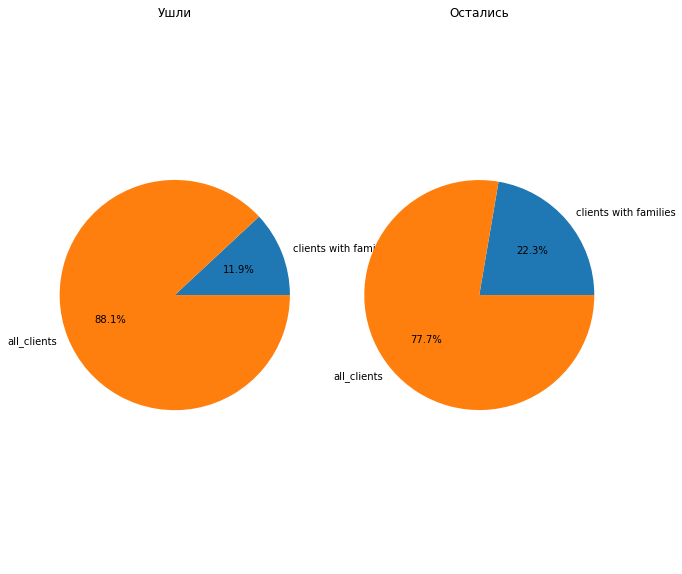

In [429]:
df_60 = bad_data[(bad_data['Partner']== 1) & (bad_data['Dependents']== 1)].shape[0]
df_61 = bad_data.shape[0]

df_62 = good_data[(good_data['Partner']== 1) & (good_data['Dependents']== 1)].shape[0]
df_63 = good_data.shape[0]

vals_bad = [df_60, df_61]
labels_bad = ['clients with families', 'all_clients']

vals_good = [df_62, df_63]
labels_good = ['clients with families', 'all_clients']

fig, ax = plt.subplots(nrows = 1, ncols = 2, squeeze = False, figsize = (10, 10))

ax[0][0].pie(vals_bad, labels = labels_bad, autopct ='%1.1f%%')
ax[0][0].axis('equal')
ax[0][0].set_title('Ушли')

ax[0][1].pie(vals_good, labels = labels_good, autopct ='%1.1f%%')
ax[0][1].axis('equal')
ax[0][1].set_title('Остались')

plt.show()

Среди оставшихся процент семей с детьми почти в два раза выше, чем среди ушедших, из чего можно сделать вывод, что клиенты, у которых есть партнер и дети чаще остаются клиентами, чем уходят.

Далее имеет смысл посмотреть разбивку этих двух критериев по отдельности (люди, у которых есть дети и отдельно люди, состоящие в браке):

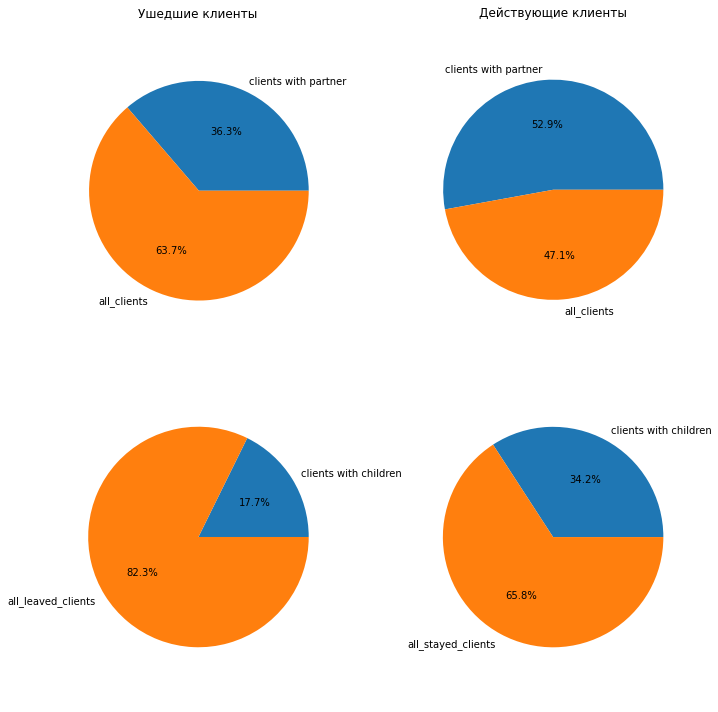

In [457]:
df_42 = bad_data[(bad_data['Partner']== 1)].shape[0]
df_43 = bad_data[(bad_data['Partner']== 0)].shape[0]

df_44 = good_data[(good_data['Partner']== 1)].shape[0]
df_45 = good_data[(good_data['Partner']== 0)].shape[0]

vals_bad = [df_42, df_43]
labels_bad = ['clients with partner', 'all_clients']

vals_good = [df_44, df_45]
labels_good = ['clients with partner', 'all_clients']

df_46 = bad_data[(bad_data['Dependents']== 1)].shape[0]
df_47 = bad_data[(bad_data['Dependents']== 0)].shape[0]

df_48 = good_data[(good_data['Dependents']== 1)].shape[0]
df_49 = good_data[(good_data['Dependents']== 0)].shape[0]

vals_bad_ch = [df_46, df_47]
labels_bad_ch = ['clients with children', 'all_leaved_clients']

vals_good_ch = [df_48, df_49]
labels_good_ch = ['clients with children', 'all_stayed_clients']

fig, axs = plt.subplots(nrows = 2, ncols = 2, squeeze = False, figsize = (10, 10))
axs[0, 0].pie(vals_bad, labels = labels_bad, autopct ='%1.1f%%')
axs[0, 0].axis('equal')
axs[0, 0].set_title('Ушедшие клиенты')

axs[0, 1].pie(vals_good, labels = labels_good, autopct ='%1.1f%%')
axs[0, 1].axis('equal')
axs[0, 1].set_title('Действующие клиенты')

axs[1, 0].pie(vals_bad_ch, labels = labels_bad_ch, autopct ='%1.1f%%')
axs[1, 0].axis('equal')

axs[1, 1].pie(vals_good_ch, labels = labels_good_ch, autopct ='%1.1f%%')
axs[1, 1].axis('equal')

plt.tight_layout()
fig.tight_layout()
plt.show()

Если посмотреть отдельную разбивку, то мы увидим, что среди оставшихся процент людей с детьми и состоящих в браке выше, чем среди ушедших клиентов. То есть клиенты компании делятся примерно поровну: те, кто состоят в браке и те, кто свободны и лишь треть из них, это люди с детьми.

#### Гипотеза 7 - Пенсионеры перестают быть клиентами компании чаще, чем не пенсионеры

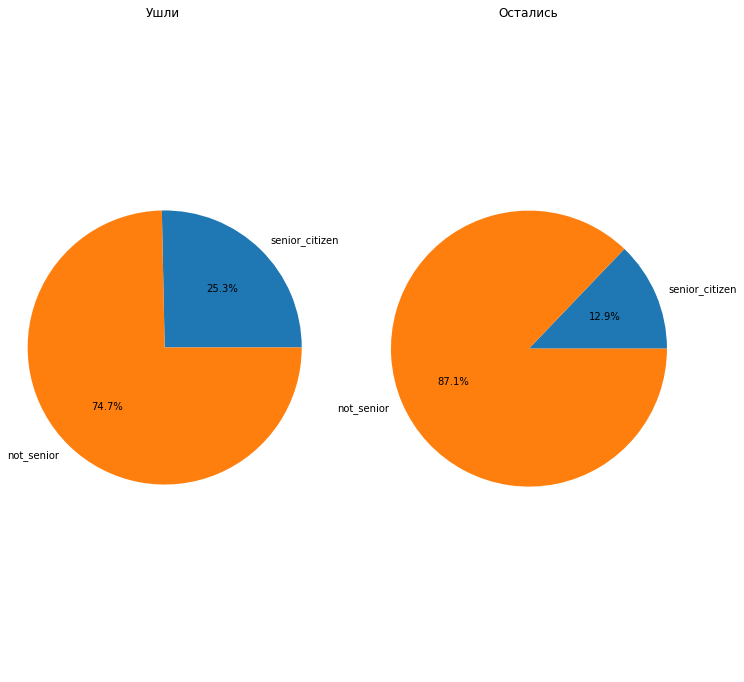

In [459]:
#находим число пенсионеров в "плохих" данных
df_30 = bad_data[(bad_data['SeniorCitizen'] == 1)].shape[0]
df_31 = bad_data[(bad_data['SeniorCitizen'] == 0)].shape[0]

#находим число пенсионеров в "хороших" данных
df_32 = good_data[(good_data['SeniorCitizen'] == 1)].shape[0]
df_33 = good_data[(good_data['SeniorCitizen'] == 0)].shape[0]

#визуализируем полученные данные
vals_bad = [df_30, df_31]
labels_bad = ['senior_citizen', 'not_senior']

vals_good = [df_32, df_33]
labels_good = ['senior_citizen', 'not_senior']

fig, ax = plt.subplots(nrows = 1, ncols = 2, squeeze = False, figsize = (12, 12))
ax[0][0].pie(vals_bad, labels = labels_bad, autopct ='%1.1f%%')
ax[0][0].axis('equal')
ax[0][0].set_title('Ушли')

ax[0][1].pie(vals_good, labels = labels_good, autopct ='%1.1f%%')
ax[0][1].axis('equal')
ax[0][1].set_title('Остались')

plt.show()

Среди ушедших клиентов процент клиентов-пенсионеров выше, чем среди оставшихся. Из чего можно сделать вывод, что среди клиентов-пенсионеров есть тенденция к уходу из компании, но сказать, что именно они составляют бОльшую часть оттока клиентов нельзя.

Гипотеза не подтвердилась.

#### Гипотеза 8 - женщины уходят чаще, чем мужчины из компании

Посмотрим в разрезе гендера: сколько ушло мужчин и сколько ушло женщин

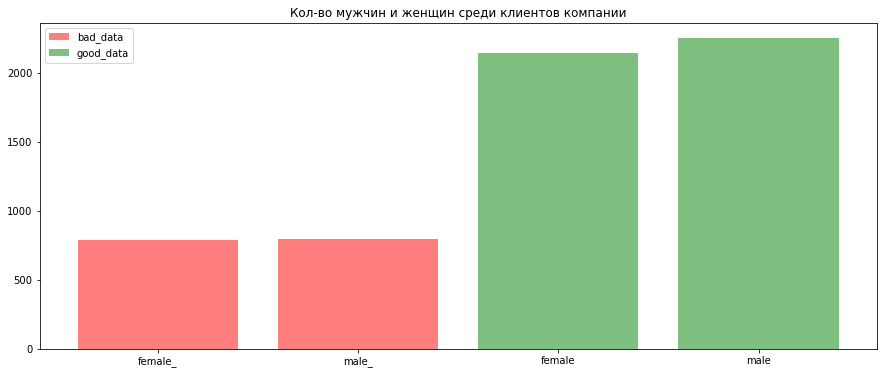

In [450]:
df_80 = good_data[(good_data['gender'] == 1)].shape[0]
x_80 = 'female'

df_81 = good_data[(good_data['gender'] == 0)].shape[0]
x_81 = 'male'

df_82 = bad_data[(bad_data['gender'] == 1)].shape[0]
x_82 = 'female_'

df_83 = bad_data[(bad_data['gender'] == 0)].shape[0]
x_83 = 'male_'

#визуализируем полученные данные
fig, ax = plt.subplots(figsize = (15,6))

ax.bar(x_82, df_82, color = 'red', label = 'bad_data', alpha = 0.5)
ax.bar(x_83, df_83, color = 'red', alpha = 0.5)

ax.bar(x_80, df_80, color = 'green', label = 'good_data', alpha = 0.5)
ax.bar(x_81, df_81, color = 'green', alpha = 0.5)

ax.set_title('Кол-во мужчин и женщин среди клиентов компании')
ax.legend()

plt.show()

Посмотрим разбивку в процентом соотнешении между мужчинами и женщинами:

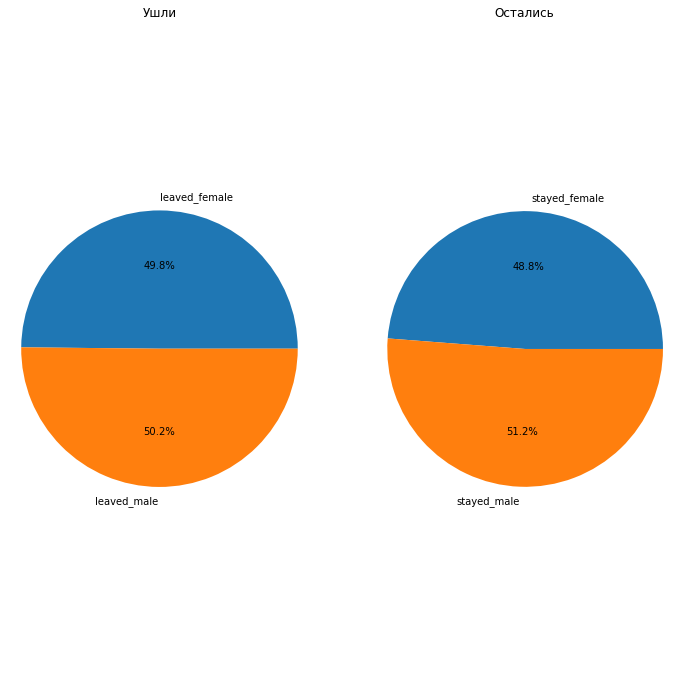

In [452]:
df_34 = bad_data[(bad_data['gender'] == 1)].shape[0]
df_35 = bad_data[(bad_data['gender'] == 0)].shape[0]

df_36 = good_data[(good_data['gender'] == 1)].shape[0]
df_37 = good_data[(good_data['gender'] == 0)].shape[0]

vals_bad = [df_34, df_35]
labels_bad = ['leaved_female', 'leaved_male']

vals_good = [df_36, df_37]
labels_good = ['stayed_female', 'stayed_male']

fig, ax = plt.subplots(nrows = 1, ncols = 2, squeeze = False, figsize = (12, 12))
ax[0][0].pie(vals_bad, labels = labels_bad, autopct ='%1.1f%%')
ax[0][0].axis('equal')
ax[0][0].set_title('Ушли')

ax[0][1].pie(vals_good, labels = labels_good, autopct ='%1.1f%%')
ax[0][1].axis('equal')
ax[0][1].set_title('Остались')

plt.show()

Соотношение оставшихся, как и ушедших мужчин и женщин примерно одинаковое.

Гипотеза не подтвердилась.

#### Гипотеза 9: использование бумажного биллинга провоцирует отток клиентов

Посмотрим, какой процент клиентов использовал безбумажный биллинг среди ушедших и среди оставшихся:

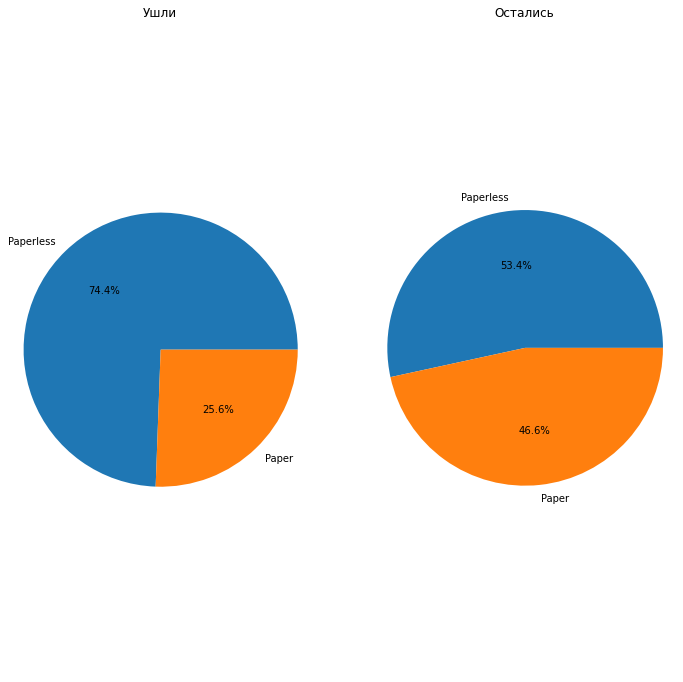

In [454]:
df_90 = bad_data[(bad_data['PaperlessBilling'] == 1)].shape[0]
df_91 = bad_data[(bad_data['PaperlessBilling'] == 0)].shape[0]

df_92 = good_data[(good_data['PaperlessBilling'] == 1)].shape[0]
df_93 = good_data[(good_data['PaperlessBilling'] == 0)].shape[0]

vals_bad = [df_90, df_91]
labels_bad = ['Paperless', 'Paper']

vals_good = [df_92, df_93]
labels_good = ['Paperless', 'Paper']

fig, ax = plt.subplots(nrows = 1, ncols = 2, squeeze = False, figsize = (12, 12))
ax[0][0].pie(vals_bad, labels = labels_bad, autopct ='%1.1f%%')
ax[0][0].axis('equal')
ax[0][0].set_title('Ушли')

ax[0][1].pie(vals_good, labels = labels_good, autopct ='%1.1f%%')
ax[0][1].axis('equal')
ax[0][1].set_title('Остались')

plt.show()

Безбумажным биллингом среди ушедших пользовался больший процент людей, чем среди оставшихся компанию. Гипотеза была в том, что преимущество как раз за безбумажным биллингом, и она не подтвердилась. Компании нужно обратить внимание на этот процесс, возможно его нужно изменить, сделать более удобным или исправить.

Визуализируем данные по методу оплаты:

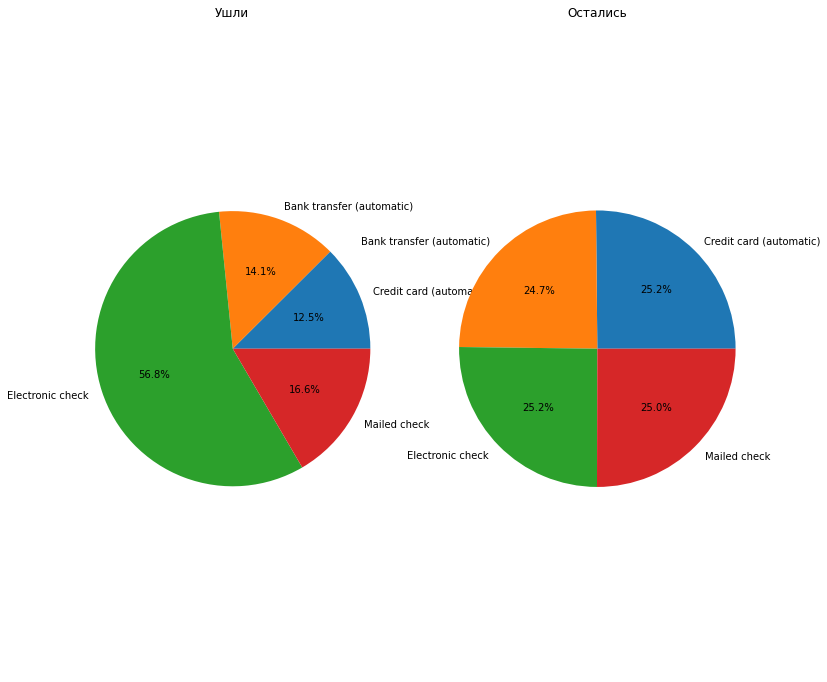

In [448]:
df_94 = bad_data[(bad_data['PaymentMethod'] == 0)].shape[0]
df_95 = bad_data[(bad_data['PaymentMethod'] == 1)].shape[0]
df_96 = bad_data[(bad_data['PaymentMethod'] == 2)].shape[0]
df_97 = bad_data[(bad_data['PaymentMethod'] == 3)].shape[0]

df_98 = good_data[(good_data['PaymentMethod'] == 0)].shape[0]
df_99 = good_data[(good_data['PaymentMethod'] == 1)].shape[0]
df_100 = good_data[(good_data['PaymentMethod'] == 2)].shape[0]
df_101 = good_data[(good_data['PaymentMethod'] == 3)].shape[0]

vals_bad = [df_94, df_95, df_96, df_97]
labels_bad = ['Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check', 'Mailed check']

vals_good = [df_98, df_99, df_100, df_101]
labels_good = ['Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check', 'Mailed check']

fig, ax = plt.subplots(nrows = 1, ncols = 2, squeeze = False, figsize = (12, 12))
ax[0][0].pie(vals_bad, labels = labels_bad, autopct ='%1.1f%%')
ax[0][0].axis('equal')
ax[0][0].set_title('Ушли')

ax[0][1].pie(vals_good, labels = labels_good, autopct ='%1.1f%%')
ax[0][1].axis('equal')
ax[0][1].set_title('Остались')

plt.show()

Больше половины клиентов, которые ушли использовали Electronic Check, причем между остальными платежами кол-во людей делится примерно поровну. Из чего можно сделать вывод, что компании нужно обратить внимание на клиентов, которые используют этот метод оплаты, возможно он провоцирует часть оттока.

Среди оставшихся клиентов компании видно четкое разделение на четыре равные части между методами оплаты.

#### Основные выводы:

- нужно обратить внимание на метод оплаты Electronic Check и PaperlessBilling

- гендер никаким образом не влияет на отток

- среди пенсионеров присутствует тенденция к оттоку, но сказать, что они составляют основной процент ушедших - нельзя

- клиенты компании делятся примерно поровну: те, кто состоят в браке и те, кто свободны и лишь треть из них, это люди с детьми

- можно выделить услугу online_security, среди оставшихся процент людей, у которых она подключена почти в два раза больше

- из всех сервисов преобладает именно услуга телефонной связи

- отток среди клиентов с длительными контрактами - ниже

- у компании получается привлечь клиентов, но не получается удержать именно в первые месяцы

### 3. Построение моделей для прогнозирования оттока (с обоснованием выбора той или иной модели) на основе проверенных гипотез и выявленных взаимосвязей

In [40]:
from sklearn.model_selection import (GridSearchCV, train_test_split, StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [41]:
# задаем параметры алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 10)}

svc_params = {'C': np.arange(0.1, 2, 0.1)}  # SVC

lr_params = {'C': np.arange(0.5, 2, 0.1)}

In [42]:
#убираем из основного датасета столбец с результатами и делим получившийся датасет на две части

data_wo_churn = data.drop(['Churn'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(data_wo_churn, data['Churn'], 
                                                    test_size = 0.3, random_state = 17)

In [43]:
#настраиваем 5-ти кратную кросс-валидацию
skf = StratifiedKFold(n_splits = 5, random_state = 17, shuffle = True)

In [44]:
#с помощью GridSearchCV выбираем лучшие параметры для каждого алгоритма и обучаем модель на данных
gbc = GradientBoostingClassifier()
grid_search_gbc = GridSearchCV(gbc, gbc_params, cv=skf)
model_gbc = grid_search_gbc.fit(x_train, y_train)
predictions_gbc = model_gbc.predict(x_test)

In [45]:
rfc = RandomForestClassifier()
grid_search_rfc = GridSearchCV(rfc, rfc_params, cv=skf)
model_rfc = grid_search_rfc.fit(x_train, y_train)
predictions_rfc = model_rfc.predict(x_test)

In [46]:
svc = SVC()
grid_search_svc = GridSearchCV(svc, svc_params, cv=skf)
model_svc = grid_search_svc.fit(x_train, y_train)
predictions_svc = model_svc.predict(x_test)

In [47]:
lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, lr_params, cv=skf)
model_lr = grid_search_lr.fit(x_train, y_train)
predictions_lr = model_lr.predict(x_test)

### 4. Сравнение качества моделей

In [48]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

Чтобы оценить качество моделей, нужно выбрать метрику для оценки. 
Метрика Accuracy не очень подойдет для этой задачи, так как кол-во оставшихся людей преобладает над теми, кто ушел, таким образом классы не сбалансированы. 

Такие критерии, как точность и полнота не зависят от размера классов, поэтому лучше рассмотреть для сравнения их. Так как для решения данной задачи важнее минимизировать FP (лучше ошибочно отнести к тем, кто уйдет, чем пропустить действительный уход клиента), поэтому я предлагаю взять за критерий качества модели метрику - precision и сравнивать по ней.


Precision показывает долю правильно полученных положительных ответов из всех полученных положительных.

In [49]:
precision_score(y_test, predictions_gbc)

0.6592797783933518

In [50]:
precision_score(y_test, predictions_rfc)

0.6277777777777778

In [51]:
precision_score(y_test, predictions_svc)

0.0

In [52]:
precision_score(y_test, predictions_lr)

0.6421052631578947

Исходя из полученных данных, можно сказать, что лучше всех справился GradientBoostingClassifier, а SVC не справился совсем, если судить по этой метрике, поэтому предлагаю еще посмотреть такую метрику, как F-мера, которая объединяет в себе точность и полноту.

In [483]:
f1_score(y_test, predictions_gbc)

0.5700598802395209

In [484]:
f1_score(y_test, predictions_rfc)

0.5441176470588235

In [485]:
f1_score(y_test, predictions_svc)

0.0

In [486]:
f1_score(y_test, predictions_lr)

0.5714285714285714

Можно сказать, что исходя из этой метрики  модель LogisticRegression справилась лучше, но разница с GradientBoostingClassifier достаточно невелика, поэтому можно сказать, что по этой метрике они справились примерно одинаково.